## Prepae the Notebook

In [2]:
import re
import random
import string

import numpy as np
import pandas as pd

import seaborn
import matplotlib.pyplot as plt

%matplotlib inline

import torch.nn as nn

import warnings
warnings.filterwarnings('ignore')

In [3]:
WORKING_DIR = 'https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots'
DATASET_DIR = '/kaggle/input/wikipedia-movie-plots/wiki_movie_plots_deduped.csv'

## Load Dataset

In [31]:
df = pd.read_csv(DATASET_DIR)

In [32]:
df = pd.DataFrame(df['Plot'])
df.head(4)

,Plot
0,"A bartender is working at a saloon, serving dr..."
1,"The moon, painted with a smiling face hangs ov..."
2,"The film, just over a minute long, is composed..."
3,Lasting just 61 seconds and consisting of two ...


In [33]:
df['Plot'][1]

"The moon, painted with a smiling face hangs over a park at night. A young couple walking past a fence learn on a railing and look up. The moon smiles. They embrace, and the moon's smile gets bigger. They then sit down on a bench by a tree. The moon's view is blocked, causing him to frown. In the last scene, the man fans the woman with his hat because the moon has left the sky and is perched over her shoulder to see everything better."

In [34]:
df.describe()

,Plot
count,34886
unique,33869
top,"(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou..."
freq,6


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Plot    34886 non-null  object
dtypes: object(1)
memory usage: 272.7+ KB


In [36]:
df.isna().sum()

Plot    0
dtype: int64

In [37]:
print(df['Plot'].duplicated().sum())
df[df['Plot'].duplicated()]

1017


,Plot
286,"As described in a film magazine,[1] Jules Lene..."
370,Mrs. O'Brien (Herring) is eager to be accepted...
400,"A young woman, who is employed as a nanny to a..."
603,"In London during World War One, a simple-minde..."
1308,"South of the U.S. border, Don José Tostado, a ..."
...,...
34434,It is 22 November 2007. Jiro Kitamura (Keisuke...
34561,When his older brothers Yangnyeong and Hyoryeo...
34703,E is everything to B. B is desperate because h...
34749,"Qingzi, a Chinese language teacher at an eleme..."


In [38]:
df = df.drop_duplicates(subset='Plot')
print(df['Plot'].duplicated().sum())

0


In [39]:
df.shape

(33869, 1)

## Exploratory Data Analysis

In [40]:
from wordcloud import WordCloud

In [41]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Plot']))

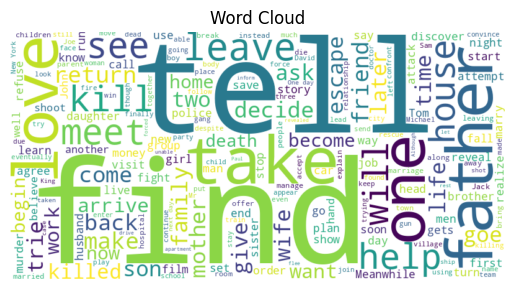

In [42]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

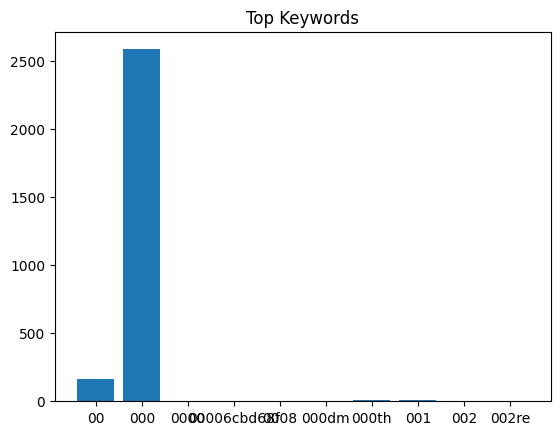

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Plot'])
keywords = vectorizer.get_feature_names_out()

plt.bar(keywords[:10], X.sum(axis=0).A1[:10])
plt.title('Top Keywords')
plt.show()

In [55]:
import nltk
from collections import Counter
from gensim.models import LdaModel

In [59]:
clean_plots = [plot.lower().replace(".", "").replace(",", "") for plot in df['Plot']]

tokenized_plots = [nltk.word_tokenize(plot) for plot in clean_plots]

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
tokenized_plots = [[word for word in tokens if word not in stop_words] for tokens in tokenized_plots]

In [60]:
word_counts = Counter()
for plot in tokenized_plots:
    word_counts.update(plot)

top_words = word_counts.most_common(10)
print("Top 10 most frequent words:", top_words)

Top 10 most frequent words: [("'s", 150421), ('(', 112812), (')', 112776), ("''", 35496), ('``', 35366), ('one', 27977), ('father', 22380), ('back', 21615), ('two', 19259), ('tells', 18956)]


In [61]:
top_words

[("'s", 150421),
 ('(', 112812),
 (')', 112776),
 ("''", 35496),
 ('``', 35366),
 ('one', 27977),
 ('father', 22380),
 ('back', 21615),
 ('two', 19259),
 ('tells', 18956)]

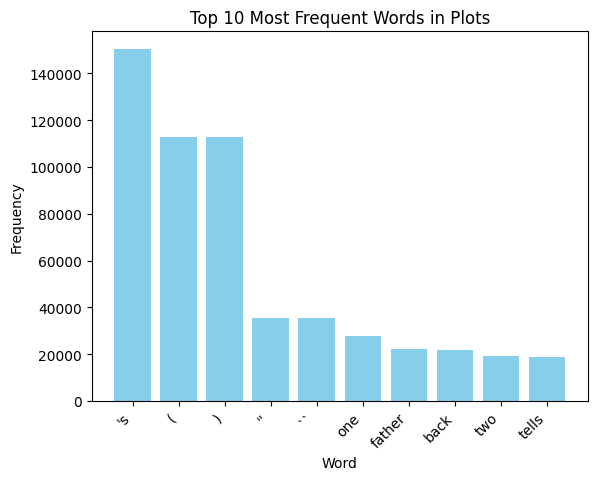

In [73]:
top_10_words, top_10_counts = zip(*top_words)

plt.bar(top_10_words, top_10_counts, color="skyblue")

plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words in Plots")

plt.xticks(rotation=45, ha="right")

plt.show()